# Project: Investigate a Dataset Of an economic nature from Gapminder.org

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is intended to analyze the infeluences of the population, GDP, and debt to foreigners on foreign           investment inflows accross the period from year 1990 to 2018.

The indicator datasets are collected from Gapminder World https://www.gapminder.org/data/ as  (4) ".csv" files including the following variables:

1.Dependent variable: 

            -"foreign investment inflows":Net inflows of investment to aquire a lasting management interest in an enterprise operating in an economy other that that of the investor.(in percent)
    
2.Independent variables:

           -"population": Total population.

           -"GDP_Per_Capita_USD": Gross Domestic Product per Capita in US Dollars. (in USD)

           -"Debt for foreigners": Total external debt stocks to gross national income.(in percent)

           -"Years": the Year to which the data is related. (year)
           
           -"country": the country to which the data is related.
      
the region and country levels was considered, using region categories taken from https://www.gapminder.org/data/geo/ as Excel file (.xlsx) that Gapminder also provides and include the indicator:   

            -"Region": the region to which the data is related. 
            
The analysis would answer the following questions:

        1.what is the infeluences of the population, GDP,and debt to foreigners on foreign investment inflows accross period from year 1990 to 2018?

        2.How did the foreign investment inflows changed over the years?
    
        3.what are the regions with highest inflows and lowest inflows?

In [47]:
#load the packages required for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

###### load the data

In [5]:
#load and convert to region Excel dataset (.xlsx) to (.csv) file
df_regions = pd.read_excel('Data Geographies - v1 - by Gapminder.xlsx', 'list-of-countries-etc', index_col=None)
df_regions.to_csv('csvfile.csv', encoding='utf-8', index=False)

In [6]:
#load the (.csv) datasets
df_population = pd.read_csv('population_total.csv')
df_gdp = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_debt = pd.read_csv('debt_to_foreigners_by_public_and_private_percent_of_gni.csv')
df_investment_inflows = pd.read_csv('foreign_direct_investment_net_inflows_percent_of_gdp.csv')

###### print few lines of the data and inspect them 

In [8]:
df_regions.head()

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017"
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,1946-11-19,South Asia,Low income,NaN
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,1955-12-14,Europe & Central Asia,Upper middle income,NaN
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,1962-10-08,Middle East & North Africa,Upper middle income,NaN
3,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,1993-07-28,Europe & Central Asia,High income,NaN
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1976-12-01,Sub-Saharan Africa,Lower middle income,NaN


In [13]:
#remove all unnecessary columns from region dataset
df_regions = df_regions.filter(['name','four_regions'])

,name,four_regions
0,Afghanistan,asia
1,Albania,europe
2,Algeria,africa
3,Andorra,europe
4,Angola,africa
...,...,...
192,Vietnam,asia
193,Yemen,asia
194,Zambia,africa
195,Zimbabwe,africa


In [21]:
#rename the columns in the regions dataset to match the other datasets when merging together
df_regions = df_regions.rename(columns={'name':'country','four_regions':'region'})
df_regions.head()

,country,region
0,Afghanistan,asia
1,Albania,europe
2,Algeria,africa
3,Andorra,europe
4,Angola,africa


In [9]:
df_population.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
1,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,...,70400000,70500000,70500000,70600000,70700000,70700000,70700000,70700000,70700000,70700000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63000,62900,62900,62800,62700,62700,62600,62500,62500,62400
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,168000000,170000000,172000000,175000000,177000000,179000000,182000000,184000000,186000000,188000000


In [10]:
df_investment_inflows.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.000132,0.000246,0.000094,0.000156,NaN,NaN,0.000016,-0.000081,NaN,...,0.0120,0.00293,0.00284,0.00235,0.00210,0.00850,0.00483,0.00255,0.00613,0.00123
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0914,0.08140,0.07450,0.09820,0.08690,0.08690,0.08810,0.07860,0.07950,0.07910
2,Algeria,0.016500,0.000118,0.006140,0.005850,0.0271,0.00765,0.010500,0.008510,0.00513,...,0.0143,0.01290,0.00718,0.00807,0.00703,-0.00324,0.01020,0.00717,0.00867,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.0385,-0.02700,-0.01140,-0.05210,0.02510,0.08630,-0.00178,-0.06060,-0.06370,-0.04330
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028400,-0.07850,...,0.0842,0.05730,0.10800,0.11400,0.03700,0.08530,0.06780,0.10700,0.08390,NaN


In [11]:
df_gdp.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


In [12]:
df_debt.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2000,0.1530,0.1480,0.1360,0.1250,0.1280,0.1310,0.1330,0.1340,0.1340
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3890,0.4610,0.5030,0.6040,0.6980,0.6470,0.7510,0.7250,0.7710,0.6720
2,Algeria,0.198,0.250,0.230,0.346,0.256,0.301,0.351,0.514,0.610,...,0.0546,0.0451,0.0306,0.0269,0.0256,0.0264,0.0289,0.0345,0.0346,0.0322
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3180,0.3510,0.3330,0.3760,0.4330,0.4160,0.5100,0.5960,0.4440,0.5400
4,Argentina,0.194,0.189,0.202,0.140,0.107,0.149,0.186,0.207,0.234,...,0.4140,0.3090,0.2770,0.2620,0.2770,0.2970,0.3030,0.3460,0.3780,0.5610


###### it turns out that one of the variables-which is 'years'- is needed to be as a column, so the melt function was used to convert the years into columns in each uploaded dataset and inside the function ,there is a panda series to specify the pre-determined period of years for the analysis 

In [16]:
#the series is converted into string because the column headers are strings
year = pd.Series(range(1990,2019)).astype(str)
df_population_melted = pd.melt(df_population,id_vars=['country'],value_vars=year,var_name='year',value_name='population')
df_population_melted

,country,year,population
0,Afghanistan,1990,12400000
1,Albania,1990,3290000
2,Algeria,1990,25800000
3,Andorra,1990,54500
4,Angola,1990,11800000
...,...,...,...
5650,Venezuela,2018,28900000
5651,Vietnam,2018,95500000
5652,Yemen,2018,28500000
5653,Zambia,2018,17400000


In [22]:
df_investment_inflows_melted = pd.melt(df_investment_inflows,id_vars=['country'],value_vars=year,var_name='year',value_name='investment_inflows')
df_investment_inflows_melted

,country,year,investment_inflows
0,Afghanistan,1990,NaN
1,Albania,1990,0.000000
2,Algeria,1990,0.000005
3,Angola,1990,-0.029800
4,Antigua and Barbuda,1990,0.132000
...,...,...,...
5505,Venezuela,2018,NaN
5506,Vietnam,2018,0.063200
5507,Yemen,2018,-0.010200
5508,Zambia,2018,0.015100


In [23]:
df_gdp_melted = pd.melt(df_gdp,id_vars=['country'],value_vars=year,var_name='year',value_name='gdp')
df_gdp_melted

,country,year,gdp
0,Afghanistan,1990,1860
1,Albania,1990,4460
2,Algeria,1990,10300
3,Andorra,1990,28400
4,Angola,1990,4760
...,...,...,...
5592,Venezuela,2018,12500
5593,Vietnam,2018,6610
5594,Yemen,2018,2360
5595,Zambia,2018,3740


In [24]:
df_debt_melted = pd.melt(df_debt,id_vars=['country'],value_vars=year,var_name='year',value_name='debt_to_foreigners')
df_debt_melted

,country,year,debt_to_foreigners
0,Afghanistan,1990,NaN
1,Albania,1990,NaN
2,Algeria,1990,0.470
3,Angola,1990,0.857
4,Argentina,1990,0.462
...,...,...,...
3504,Venezuela,2018,NaN
3505,Vietnam,2018,0.467
3506,Yemen,2018,0.261
3507,Zambia,2018,0.737


###### after melting the datasets ,they would be merged together using the merge function to form the dataset that contains all the indecators required for the analysis together.

In [27]:
#merge region with population into df_merge1
df_merge1 = pd.merge(df_regions,df_population_melted,how='outer',on=['country'])
df_merge1

,country,region,year,population
0,Afghanistan,asia,1990,12400000.0
1,Afghanistan,asia,1991,13300000.0
2,Afghanistan,asia,1992,14500000.0
3,Afghanistan,asia,1993,15800000.0
4,Afghanistan,asia,1994,17100000.0
...,...,...,...,...
5654,North Macedonia,NaN,2014,2080000.0
5655,North Macedonia,NaN,2015,2080000.0
5656,North Macedonia,NaN,2016,2080000.0
5657,North Macedonia,NaN,2017,2080000.0


In [28]:
#merge GDP with df_merge1 into df_merge2
df_merge2 = pd.merge(df_merge1,df_gdp_melted,how='outer',on=['country','year'])
df_merge2

,country,region,year,population,gdp
0,Afghanistan,asia,1990,12400000.0,1860.0
1,Afghanistan,asia,1991,13300000.0,1650.0
2,Afghanistan,asia,1992,14500000.0,1520.0
3,Afghanistan,asia,1993,15800000.0,1010.0
4,Afghanistan,asia,1994,17100000.0,721.0
...,...,...,...,...,...
5654,North Macedonia,NaN,2014,2080000.0,12300.0
5655,North Macedonia,NaN,2015,2080000.0,12800.0
5656,North Macedonia,NaN,2016,2080000.0,13100.0
5657,North Macedonia,NaN,2017,2080000.0,13100.0


In [29]:
# merge debt to foreigners with df_merge2 into df_merge3
df_merge3 = pd.merge(df_merge2,df_debt_melted,how='outer',on=['country','year'])
df_merge3

,country,region,year,population,gdp,debt_to_foreigners
0,Afghanistan,asia,1990,12400000.0,1860.0,NaN
1,Afghanistan,asia,1991,13300000.0,1650.0,NaN
2,Afghanistan,asia,1992,14500000.0,1520.0,NaN
3,Afghanistan,asia,1993,15800000.0,1010.0,NaN
4,Afghanistan,asia,1994,17100000.0,721.0,NaN
...,...,...,...,...,...,...
5654,North Macedonia,NaN,2014,2080000.0,12300.0,0.649
5655,North Macedonia,NaN,2015,2080000.0,12800.0,0.694
5656,North Macedonia,NaN,2016,2080000.0,13100.0,0.733
5657,North Macedonia,NaN,2017,2080000.0,13100.0,0.789


In [30]:
# merge investments inflows with df_merge3 into df_all_indicators
df_all_indicators = pd.merge(df_merge3,df_investment_inflows_melted,how='outer',on=['country','year'])
df_all_indicators

,country,region,year,population,gdp,debt_to_foreigners,investment_inflows
0,Afghanistan,asia,1990,12400000.0,1860.0,NaN,NaN
1,Afghanistan,asia,1991,13300000.0,1650.0,NaN,NaN
2,Afghanistan,asia,1992,14500000.0,1520.0,NaN,NaN
3,Afghanistan,asia,1993,15800000.0,1010.0,NaN,NaN
4,Afghanistan,asia,1994,17100000.0,721.0,NaN,NaN
...,...,...,...,...,...,...,...
5654,North Macedonia,NaN,2014,2080000.0,12300.0,0.649,0.00536
5655,North Macedonia,NaN,2015,2080000.0,12800.0,0.694,0.02950
5656,North Macedonia,NaN,2016,2080000.0,13100.0,0.733,0.05150
5657,North Macedonia,NaN,2017,2080000.0,13100.0,0.789,0.03370


In [31]:
df_all_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 0 to 5658
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             5659 non-null   object 
 1   region              5601 non-null   object 
 2   year                5655 non-null   object 
 3   population          5655 non-null   float64
 4   gdp                 5597 non-null   float64
 5   debt_to_foreigners  3280 non-null   float64
 6   investment_inflows  5116 non-null   float64
dtypes: float64(4), object(3)
memory usage: 353.7+ KB


##### it is clear that the datatype of the rows in the dataset containing all the indicators is objects and float64 ,and this don’t need to be changed

In [33]:
# check for duplicates
df_all_indicators.duplicated().sum()

0

In [34]:
# check for missing values
df_all_indicators.isnull().sum()

country                  0
region                  58
year                     4
population               4
gdp                     62
debt_to_foreigners    2379
investment_inflows     543
dtype: int64

In [35]:
# num of rows with missing data
df_all_indicators.isnull().any(axis=1).sum()

2472

In [36]:
df_all_indicators.shape

(5659, 7)

### Data Cleaning

### it turned out that the data has some rows with missing values and it will be removed

In [37]:
# drop rows with any null values
df_all_indicators.dropna(inplace=True)

In [38]:
# checks if any of columns in the dataset have null values
df_all_indicators.isnull().sum().any()

False

In [39]:
# review the number of rows that is still existed in the dataset
df_all_indicators.shape

(3187, 7)

In [41]:
#look at the new dataset 
df_all_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3187 entries, 16 to 5571
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             3187 non-null   object 
 1   region              3187 non-null   object 
 2   year                3187 non-null   object 
 3   population          3187 non-null   float64
 4   gdp                 3187 non-null   float64
 5   debt_to_foreigners  3187 non-null   float64
 6   investment_inflows  3187 non-null   float64
dtypes: float64(4), object(3)
memory usage: 199.2+ KB


In [42]:
df_all_indicators.describe()

,population,gdp,debt_to_foreigners,investment_inflows
count,3.187000e+03,3187.000000,3187.000000,3187.000000
mean,4.687624e+07,6056.810166,0.641181,0.037869
std,1.660884e+08,4973.737509,0.694162,0.058830
min,6.970000e+04,361.000000,0.000000,-0.372000
25%,3.120000e+06,2100.000000,0.285000,0.008280
50%,9.450000e+06,4420.000000,0.469000,0.023100
75%,2.780000e+07,8870.000000,0.768500,0.048800
max,1.430000e+09,25600.000000,11.100000,1.030000


In [44]:
df_all_indicators.groupby('country').mean()

,population,gdp,debt_to_foreigners,investment_inflows
country,,,,
Afghanistan,3.146923e+07,1603.846154,0.151923,0.008215
Albania,3.046786e+06,7406.071429,0.441536,0.054482
Algeria,3.327241e+07,11588.620690,0.316307,0.008332
Angola,1.975862e+07,5061.034483,1.140000,0.051586
Argentina,3.850345e+07,16134.482759,0.506517,0.022218
...,...,...,...,...
Venezuela,2.500000e+07,15784.000000,0.460280,0.018814
Vietnam,8.274828e+07,3496.896552,0.845207,0.059528
Yemen,1.985517e+07,3748.275862,0.591793,0.009169


In [46]:
# save progress for the next stage
df_all_indicators.to_csv('df_all_indicators.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - what is the infeluences of the population, GDP,and debt to foreigners on foreign investment inflows accross period from year 1990 to 2018?

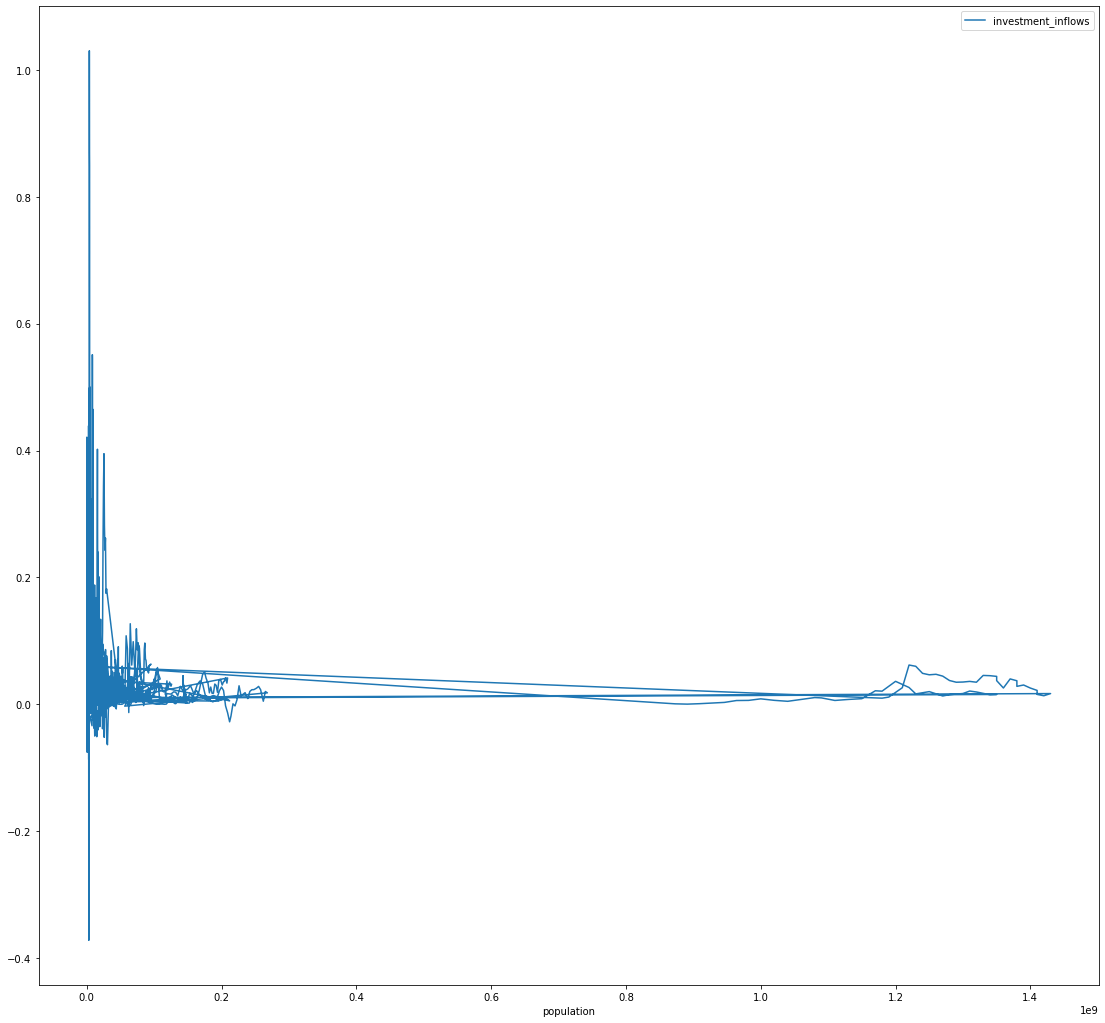

In [99]:
#plot relationship between population and foreign investment inflows
df_all_indicators.plot(x='population', y='investment_inflows', kind='line',figsize=(19, 18));

>The following median split analysis is performed to find out how population influences the foreign investments inflows.
To do that the data is splitted into low population and high population, grouped by a median split. Then the mean of foreign investment inflows is compared by group.

In [48]:
population_median = df_all_indicators['population'].median()

In [49]:
low_population = df_all_indicators.query('population <@ population_median')
high_population = df_all_indicators.query('population >=@ population_median')

In [50]:
low_population.mean()

year                           inf
population            3.568642e+06
gdp                   5.854443e+03
debt_to_foreigners    7.665622e-01
investment_inflows    5.008698e-02
dtype: float64

In [51]:
high_population.mean()

year                           inf
population            8.999401e+07
gdp                   6.258290e+03
debt_to_foreigners    5.163493e-01
investment_inflows    2.570473e-02
dtype: float64

##### As seen above, for countries with low population; the mean percent of foreign investment inflows was higher than the countries with high population.
##### These results show that there is an Inverse relationship between population and percent of foreign investment inflows.

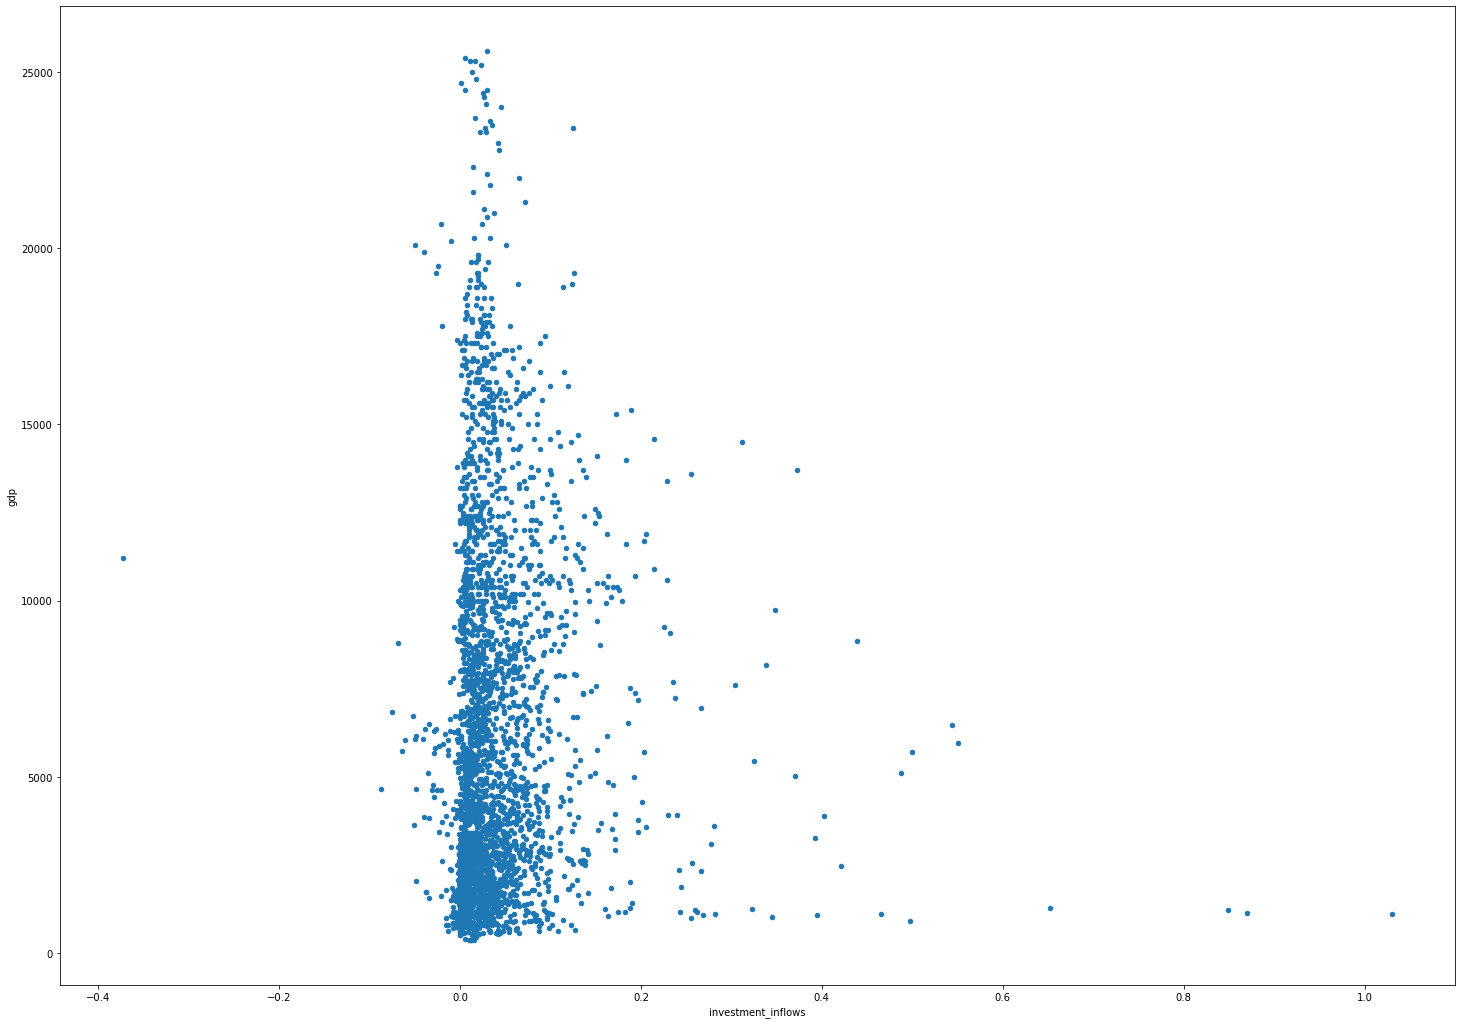

In [118]:
#plot relationship between GDP and foreign investment inflows
df_all_indicators.plot(x='investment_inflows', y='gdp', kind='scatter',figsize=(25, 18));

>The following second median split analysis is performed to find out how GDP influences the foreign investments inflows.
To do that the data is splitted into low GDP and high GDP, grouped by a median split. Then the mean of foreign investment inflows is compared by group.

In [102]:
gdp_median = df_all_indicators['gdp'].median()

In [103]:
low_gdp = df_all_indicators.query('gdp <@ gdp_median')
high_gdp = df_all_indicators.query('gdp >=@ gdp_median')

In [104]:
low_gdp.mean()

year                           inf
population            4.363725e+07
gdp                   2.197258e+03
debt_to_foreigners    7.621801e-01
investment_inflows    3.397785e-02
dtype: float64

In [105]:
high_gdp.mean()

year                           inf
population            5.010913e+07
gdp                   9.909103e+03
debt_to_foreigners    5.204094e-01
investment_inflows    4.175299e-02
dtype: float64

In [109]:
mean_investment_inflows_low = low_gdp['investment_inflows'].mean()
mean_investment_inflows_high = high_gdp['investment_inflows'].mean()

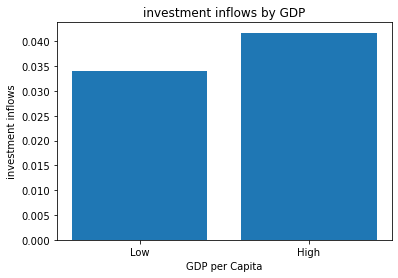

In [114]:
locations = [1, 2]
heights = [mean_investment_inflows_low, mean_investment_inflows_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('investment inflows by GDP')
plt.xlabel('GDP per Capita')
plt.ylabel('investment inflows');

##### As seen above, for countries with low GDP; the mean percent of foreign investment inflows is lower than the countries with high population.
##### These results show that there is an Positive relationship between GDP and percent of foreign investment inflows.

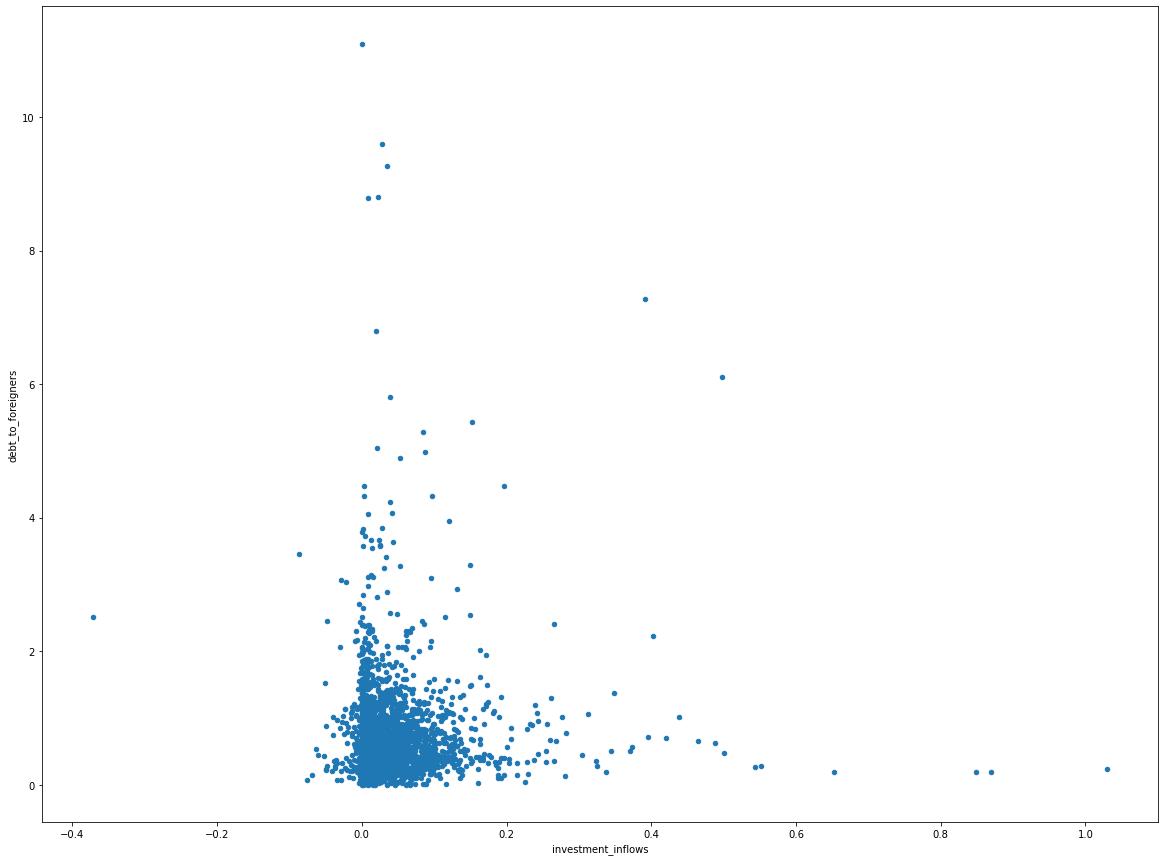

In [131]:
#plot relationship between debt to foreigners and foreign investment inflows
df_all_indicators.plot(x='investment_inflows', y='debt_to_foreigners', kind='scatter',figsize=(20, 15));

##### The above plot show negative relation between debt to foreigners and foreign investment inflows

### Research Question 2 - How did the foreign investment inflows changed over the years?

>To answer this question, the dataset is grouped by year and the average foreign investment inflows were taken to present them in a graph

In [134]:
average_year = df_all_indicators.groupby('year', as_index=False).mean()
average_year.head()

,year,population,gdp,debt_to_foreigners,investment_inflows
0,1990,4.265340e+07,4417.674157,0.968870,0.012324
1,1991,4.249320e+07,4339.811111,0.973916,0.012743
2,1992,4.438143e+07,4560.387097,0.947260,0.018144
3,1993,4.263050e+07,4684.386139,0.884891,0.018888
4,1994,4.324565e+07,4656.843137,0.915213,0.018898


C:\Users\FreeComp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


([<matplotlib.axis.XTick at 0x131582d2d00>,
 [Text(0, 0, '1990'),
  Text(1, 0, '1991'),
  Text(2, 0, '1992'),
  Text(3, 0, '1993'),
  Text(4, 0, '1994'),
  Text(5, 0, '1995'),
  Text(6, 0, '1996'),
  Text(7, 0, '1997'),
  Text(8, 0, '1998'),
  Text(9, 0, '1999'),
  Text(10, 0, '2000'),
  Text(11, 0, '2001'),
  Text(12, 0, '2002'),
  Text(13, 0, '2003'),
  Text(14, 0, '2004'),
  Text(15, 0, '2005'),
  Text(16, 0, '2006'),
  Text(17, 0, '2007'),
  Text(18, 0, '2008'),
  Text(19, 0, '2009'),
  Text(20, 0, '2010'),
  Text(21, 0, '2011'),
  Text(22, 0, '2012'),
  Text(23, 0, '2013'),
  Text(24, 0, '2014'),
  Text(25, 0, '2015'),
  Text(26, 0, '2016'),
  Text(27, 0, '2017'),
  Text(28, 0, '2018')])

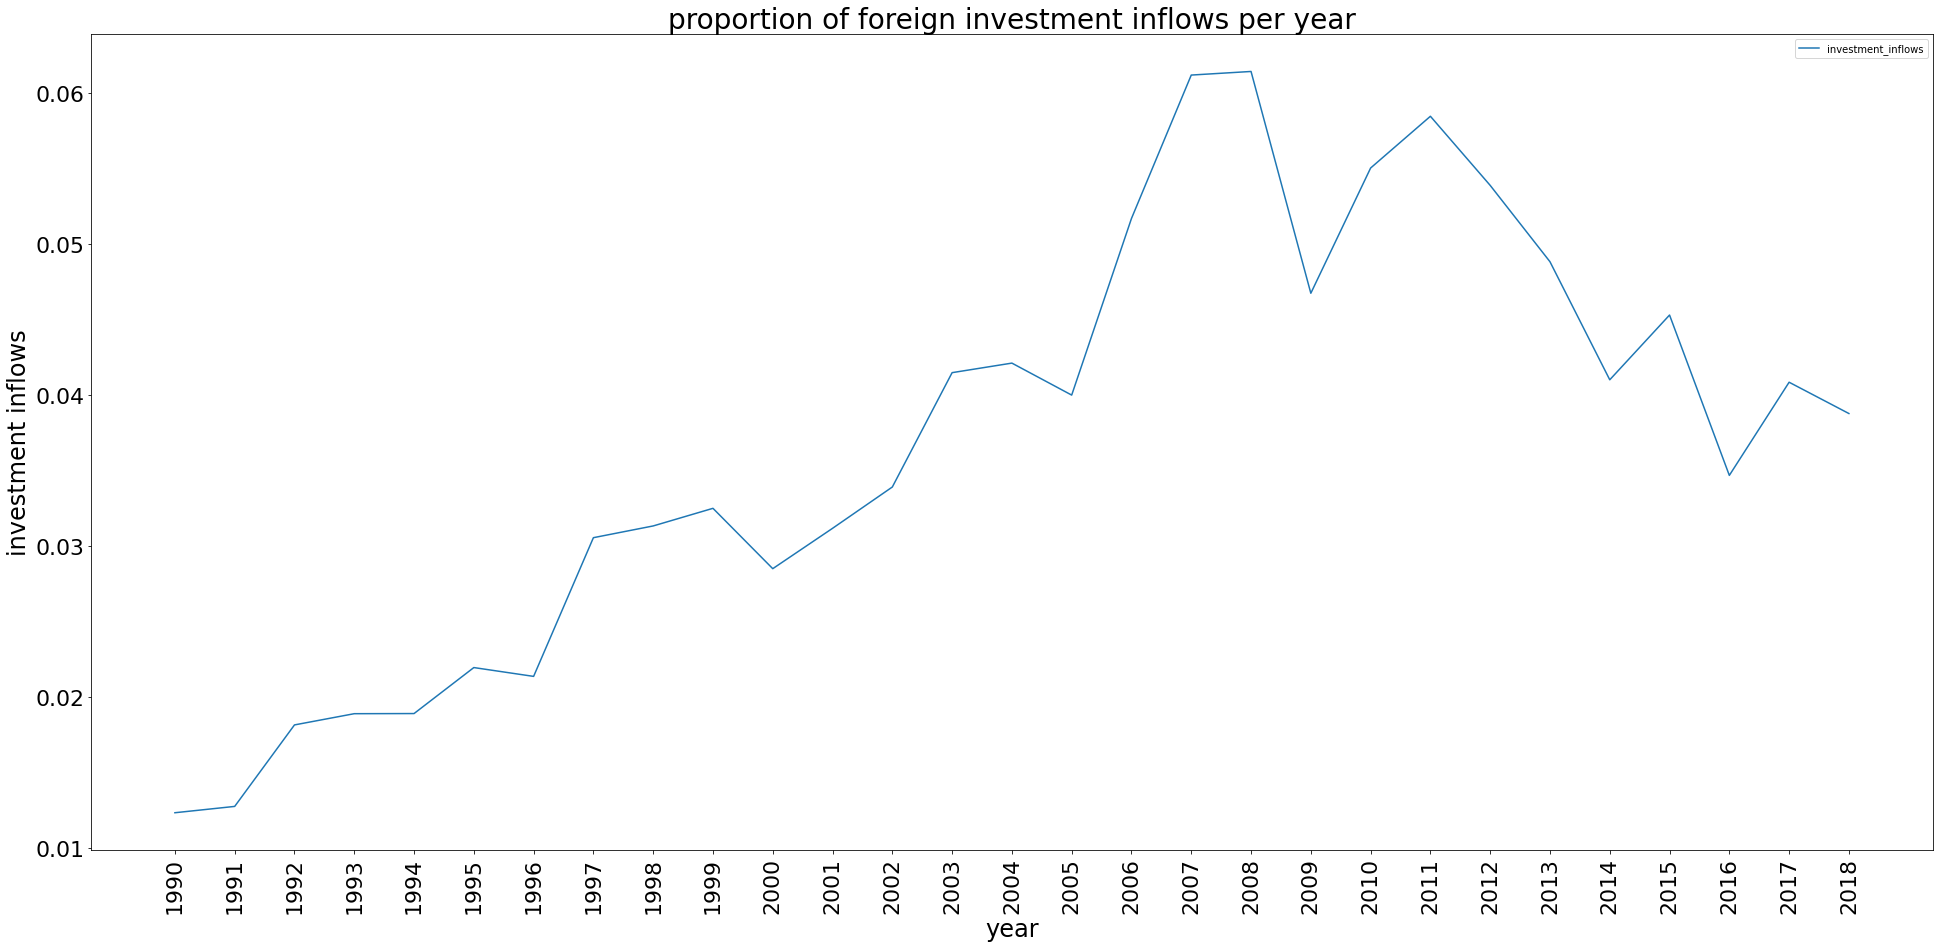

In [163]:
average_year.plot(x='year', y='investment_inflows',figsize=(33,15))
plt.xlabel('year',fontsize=24)
plt.ylabel('investment inflows',fontsize=24)
plt.title('proportion of foreign investment inflows per year',fontsize=28)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
x_axis = pd.Series(range(1990,2019)).astype(str)
plt.xticks( np.arange(29), x_axis, rotation = 90 )

In [168]:
average_year['investment_inflows'].idxmax()

18

In [171]:
average_year.iloc[18]

year                         2008
population            4.73517e+07
gdp                       6829.09
debt_to_foreigners       0.409541
investment_inflows       0.061455
Name: 18, dtype: object

###### the year of highest inflow  is 2008

#### the above plot shows an increase in the foreign investment inflows from the year 1990 to 2008 , then the foreign investment inflows indicates a decrease till 2018.

### Research Question 3 - what are the regions with highest inflows and lowest inflows?

>To answer this question, the dataset is grouped by region and the average foreign investment inflows were taken to present them in a graph

In [185]:
average_region = df_all_indicators.groupby('region', as_index=False).mean()
average_region

,region,population,gdp,debt_to_foreigners,investment_inflows
0,africa,1.957452e+07,3633.643625,0.749996,0.033153
1,americas,2.215298e+07,8772.911585,0.633902,0.044333
2,asia,1.127384e+08,5781.078652,0.523454,0.034201
3,europe,2.666363e+07,10831.445428,0.546416,0.053101


(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

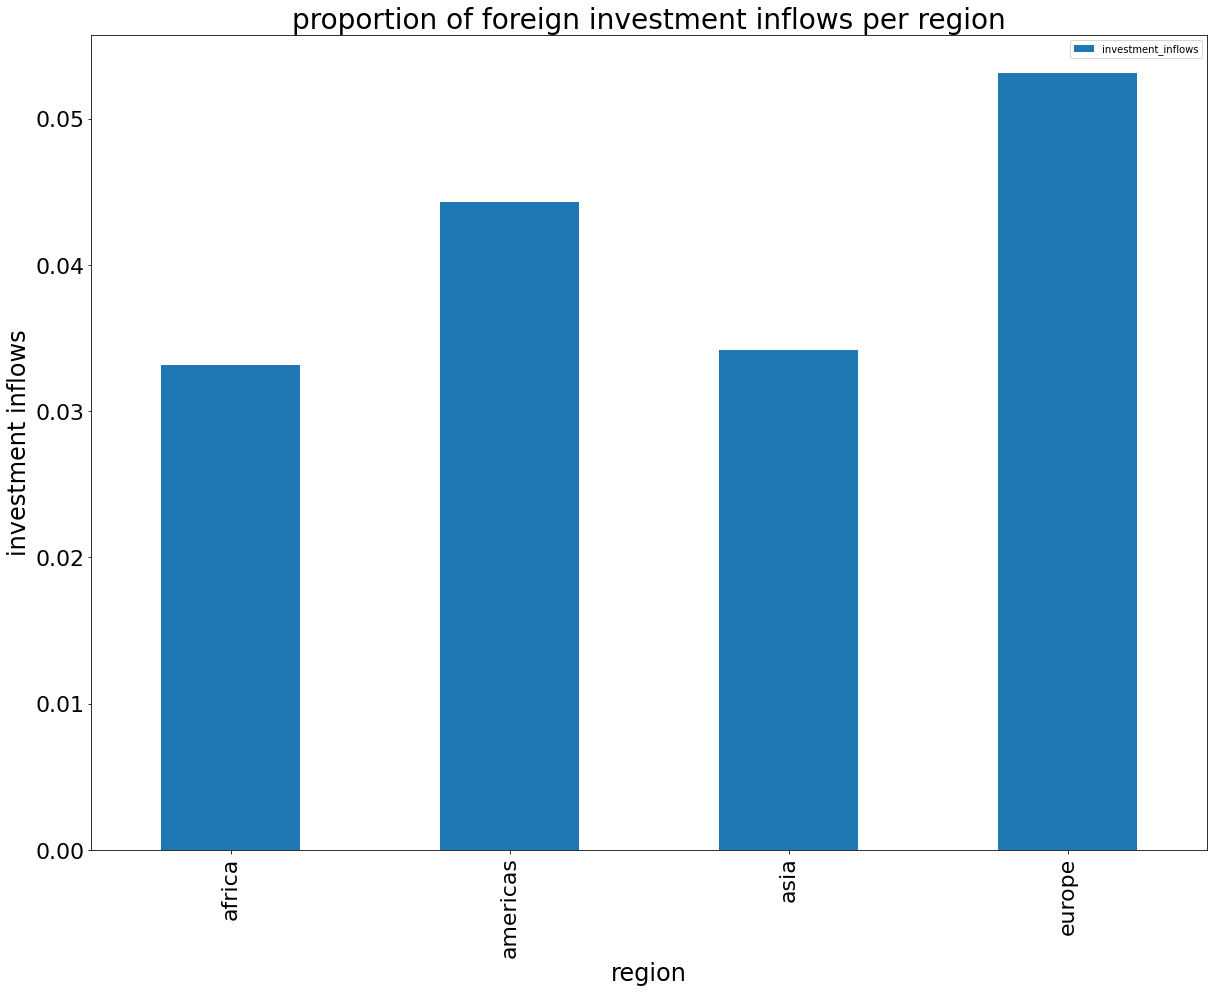

In [195]:
average_region.plot(x='region', y='investment_inflows',kind='bar',figsize=(20, 15));
plt.xlabel('region',fontsize=24)
plt.ylabel('investment inflows',fontsize=24)
plt.title('proportion of foreign investment inflows per region',fontsize=28)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

#### from the above plot, it’s obvious that the region that has the highest foreign investment inflows is europe, and the region that has the lowest foreign investment inflows is africa.

## Limitations

> For the selected indicators for the analysis, the amount of data provided was sufficient except for the debt to foreigners indicator as there were 2379 rows containing missing data and these rows were romoved from the final version of the dataset before the analysis stage. for further explooration, instead of just removing these rows, the missing values could be predicted by a machine learning method to have much more sufficient and accurate data for more confidence with the results of the analysis.

> Another limitation is that causation is not shown or discessed in the analysis, and that also would be a good point to look at for further explooration on the dataset.

<a id='conclusions'></a>
## Conclusions

>In this report, an investigation of the infeluences of the population, GDP, and debt to foreigners on foreign investment inflows accross the period from year 1990 to 2018 was carried out.

>A positive relation to foreign investment inflows was found associated with GDP, and a negative relation was found associated with population and dept to foreigners.

>an increase in the foreign investment inflows was observed from the year 1990 to 2008 , then the foreign investment inflows indicates a decrease till 2018.

>the region that has the highest foreign investment inflows is europe and this make it a more trusted region to invest in, and the region that has the lowest foreign investment inflows is africa and these informations could benefit any investor and clarify important indicators related to how to choose the right place to make investments.